BEER CLASSIFICATION PROJECT

# Notebook 1 - Data Import and Transform

This notebook will be used to import the data needed for the beer classification project. I expect that we'll also need to do some basic preliminary summaries in order to determine if we need to transform the data (check for nulls, potentially edit the beer type labels, etc.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
import seaborn as sns

In [2]:
sns.set_style("white")
sns.set_palette("Blues")
main_cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
main_color = main_cmap(0.75)
main_color = rgb2hex(main_color)

# Import

Read in the raw beer data. The data came from kaggle [at this link](https://www.kaggle.com/datasets/ruthgn/beer-profile-and-ratings-data-set)

In [3]:
df = pd.read_csv('./data/raw/beer_profile_and_ratings.csv')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3197 non-null   object 
 1   Style              3197 non-null   object 
 2   Brewery            3197 non-null   object 
 3   Beer Name (Full)   3197 non-null   object 
 4   Description        3197 non-null   object 
 5   ABV                3197 non-null   float64
 6   Min IBU            3197 non-null   int64  
 7   Max IBU            3197 non-null   int64  
 8   Astringency        3197 non-null   int64  
 9   Body               3197 non-null   int64  
 10  Alcohol            3197 non-null   int64  
 11  Bitter             3197 non-null   int64  
 12  Sweet              3197 non-null   int64  
 13  Sour               3197 non-null   int64  
 14  Salty              3197 non-null   int64  
 15  Fruits             3197 non-null   int64  
 16  Hoppy              3197 

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


We can see from the summary that all fields have no nulls. We have can break the fields into a few categories:

* Metadata fields - the name, description, and brewery of the beer
* Dependent variable field - Style (some variation of which will be our dependent variable)
* Feature fields - float and integer fields which describe the beer (e.g. Sour)
* Review fields - a few fields related to reviews (unused for this exercise)

# Preliminary Summaries

## Column Summaries
In this section, we'll pull some summaries about the fields. Let's break this into summaries of all fields at once, summaries of numerical columns, and summaries of the 'style' categorical column.

### Overall

**Questions**
* How many nulls do the columns have?
* How many unique values are in each column?

In [4]:
df.isna().sum()

Name                 0
Style                0
Brewery              0
Beer Name (Full)     0
Description          0
ABV                  0
Min IBU              0
Max IBU              0
Astringency          0
Body                 0
Alcohol              0
Bitter               0
Sweet                0
Sour                 0
Salty                0
Fruits               0
Hoppy                0
Spices               0
Malty                0
review_aroma         0
review_appearance    0
review_palate        0
review_taste         0
review_overall       0
number_of_reviews    0
dtype: int64

In [5]:
df.nunique()

Name                 3066
Style                 111
Brewery               934
Beer Name (Full)     3197
Description          1841
ABV                   194
Min IBU                21
Max IBU                25
Astringency            66
Body                  149
Alcohol               104
Bitter                133
Sweet                 183
Sour                  192
Salty                  21
Fruits                149
Hoppy                 153
Spices                138
Malty                 196
review_aroma         2326
review_appearance    2257
review_palate        2324
review_taste         2356
review_overall       2325
number_of_reviews     811
dtype: int64

### Numerical Columns
Univariate summaries of the numerical columns - this happens to include all of our potential features.

**Questions**
* What are the distributions of each feature?
* Are there any outliers or skewness to pay attention to?

In [6]:
df.describe()

,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
count,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000,3197.000000
mean,6.526688,21.180482,38.986863,16.515796,46.129496,17.055990,36.364404,58.270879,33.145449,1.017204,38.529559,40.924617,18.345637,75.330935,3.638789,3.754393,3.660428,3.702496,3.747522,233.284955
std,2.546997,13.242242,21.355281,10.410661,25.947842,17.331334,25.791152,34.281310,35.780172,2.132651,32.296646,30.403641,23.756582,39.909338,0.503209,0.403416,0.449937,0.510361,0.444288,361.811847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.509615,1.571429,1.285714,1.214286,1.136364,1.000000
25%,5.000000,15.000000,25.000000,9.000000,29.000000,6.000000,17.000000,33.000000,11.000000,0.000000,12.000000,18.000000,4.000000,45.000000,3.422559,3.604651,3.470021,3.500000,3.566667,23.000000
50%,6.000000,20.000000,35.000000,14.000000,40.000000,11.000000,31.000000,54.000000,22.000000,0.000000,29.000000,33.000000,10.000000,73.000000,3.720183,3.833333,3.741667,3.791667,3.830239,93.000000
75%,7.600000,25.000000,45.000000,21.000000,58.000000,22.000000,52.000000,77.000000,42.000000,1.000000,60.000000,56.000000,23.000000,103.000000,3.978000,4.000000,3.965587,4.033333,4.032847,284.000000
max,57.500000,65.000000,100.000000,81.000000,175.000000,139.000000,150.000000,263.000000,284.000000,48.000000,175.000000,172.000000,184.000000,239.000000,5.000000,4.666667,5.000000,5.000000,5.000000,3290.000000


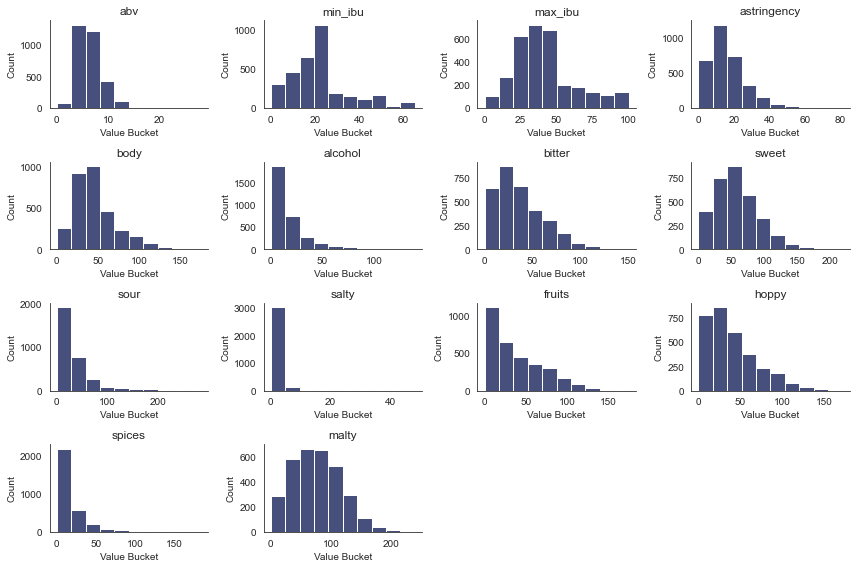

In [23]:
axes = df.hist(figsize=(12, 8), color=main_color)
for ax_row in axes:
    for ax in ax_row:
        ax.grid(False)
        ax.set_xlabel('Value Bucket')
        ax.set_ylabel('Count')
sns.despine()
plt.tight_layout()
plt.savefig('figures/histograms_predictors.png')

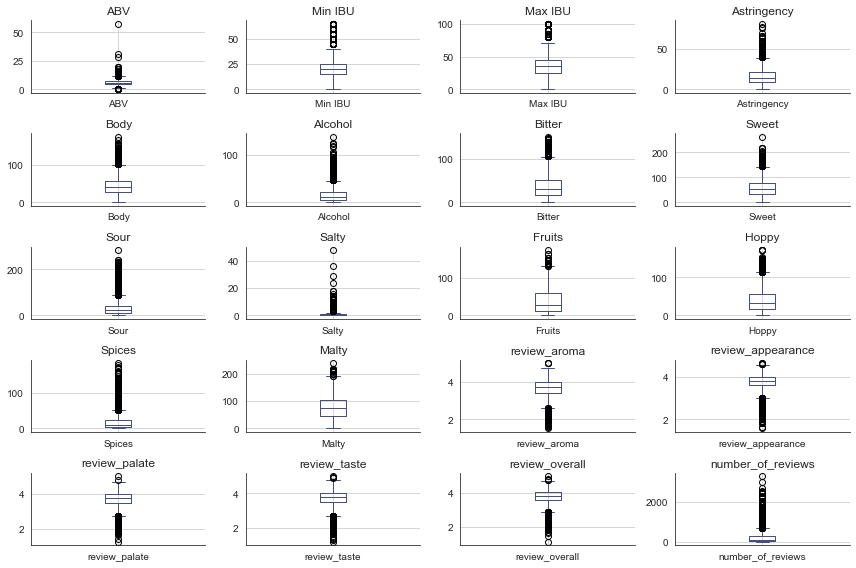

In [8]:
fig, ax = plt.subplots(5, 4, figsize=(12, 8))

for ind, col in enumerate(df.select_dtypes(exclude='object').columns):
    df.boxplot(column=col, ax=ax[ind // 4, ind%4], color=main_color)
    ax[ind // 4, ind%4].set_title(col)
    sns.despine()

plt.tight_layout()
plt.savefig('figures/boxplots_predictors.png')

We may do further outlier analysis based on modeling outputs, but from looking at this, only ABV seems to have outliers that appear to be extremely far away. We'll investigate and potentially remove those in the 'Transform' notebook section.

### Categorical Summaries (DV Summaries)
Univariate summary of the 'style' column

In [9]:
df['Style'].value_counts()

Lager - Adjunct                    45
Lager - European Pale              43
Wheat Beer - Hefeweizen            42
Stout - Irish Dry                  42
Lambic - Fruit                     42
                                   ..
Bière de Champagne / Bière Brut     8
Lager - India Pale Lager (IPL)      6
IPA - New England                   4
Brett Beer                          3
Sour - Gose                         3
Name: Style, Length: 111, dtype: int64

We can see here that there are a *lot* of categories, many with a small amount of representation. Let's look into ways to transform this! At the very least, it looks like many of the beer styles are structured as "{general style} - {specific style}". Maybe we can split them can get fewer categories

# Transform

Let's use this section to create a level 1 (general) and level 2 (specific) category field. We'll also make a few other minor adjustments (e.g. stylizing the fields all lowercase).

## Rename to lowercase, no spaces

In [10]:
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace("[()]", "")
df.columns

/var/folders/7q/8z88_mwj3794m0rym_nqtk6m0000gn/T/ipykernel_17871/2194882167.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace("[()]", "")


Index(['name', 'style', 'brewery', 'beer_name_full', 'description', 'abv',
       'min_ibu', 'max_ibu', 'astringency', 'body', 'alcohol', 'bitter',
       'sweet', 'sour', 'salty', 'fruits', 'hoppy', 'spices', 'malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews'],
      dtype='object')

## Create l1/l2 categories
Split the style column into two based on the hyphen

In [11]:
df[['style_l1', 'style_l2']] = pd.DataFrame(df['style'].str.split(" - ").tolist(), columns=['style_l1', 'style_l2'])

In [12]:
df.nunique()

name                 3066
style                 111
brewery               934
beer_name_full       3197
description          1841
abv                   194
min_ibu                21
max_ibu                25
astringency            66
body                  149
alcohol               104
bitter                133
sweet                 183
sour                  192
salty                  21
fruits                149
hoppy                 153
spices                138
malty                 196
review_aroma         2326
review_appearance    2257
review_palate        2324
review_taste         2356
review_overall       2325
number_of_reviews     811
style_l1               43
style_l2               63
dtype: int64

It looks like this gives us 41 general categories - let's take a look and see if we need to condense any further.

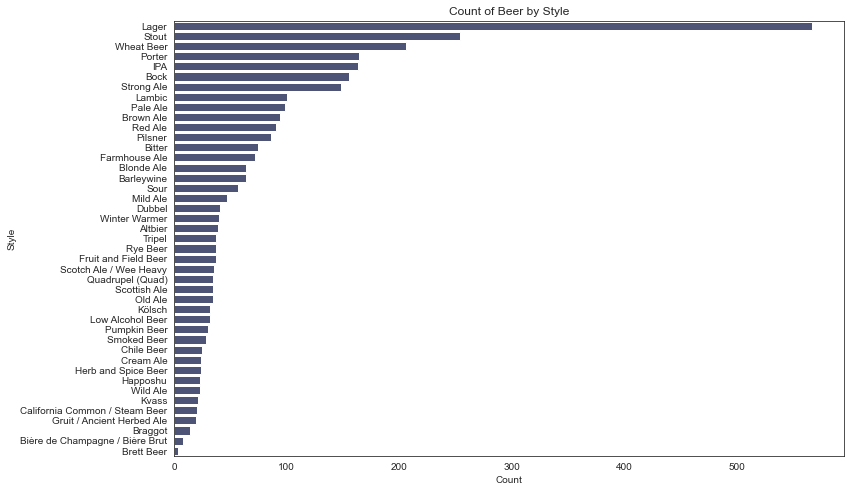

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=df, y='style_l1', color=main_color, order=df['style_l1'].value_counts().index)
plt.title('Count of Beer by Style')
plt.ylabel('Style')
plt.xlabel('Count')
plt.savefig('figures/count_styles.png')

These look pretty good - however, some of the categories have very few observations, which might lead to a challenge for classification. We'll just remove those for the purposes of this exercise. In reality, the business case would probably dictate what to do with these categories (resample, gather more data, etc.)

## Remove low count categories

In [14]:
df = df[~df['style_l1'].isin(df['style_l1'].value_counts()[df['style_l1'].value_counts() <= 15].index.tolist())]

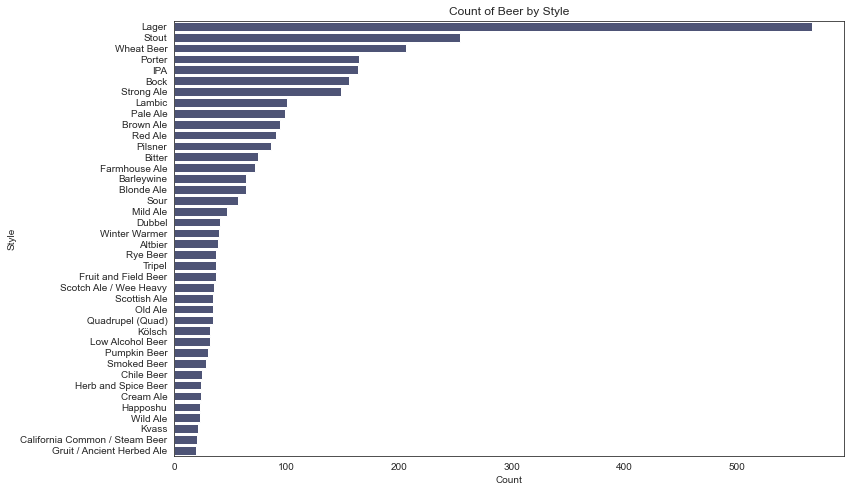

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=df, y='style_l1', color=main_color, order=df['style_l1'].value_counts().index)
plt.title('Count of Beer by Style')
plt.ylabel('Style')
plt.xlabel('Count')
plt.savefig('figures/count_styles_lowremoved.png')

## Slim down / remove 'meta' columns
We mentioned a number of additional columns that aren't needed for the primary modeling. Let's move those into a different dataframe for reference as needed.

In [16]:
df_meta = df[['name', 'brewery', 'beer_name_full', 'description', 'style', 'style_l2', 'review_aroma', 'review_taste', 'review_appearance', 'review_palate', 'review_overall', 'number_of_reviews']]
df = df.drop(['name', 'brewery', 'beer_name_full', 'description', 'style', 'style_l2', 'review_aroma', 'review_taste', 'review_appearance', 'review_palate', 'review_overall', 'number_of_reviews'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3172 entries, 0 to 3196
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   abv          3172 non-null   float64
 1   min_ibu      3172 non-null   int64  
 2   max_ibu      3172 non-null   int64  
 3   astringency  3172 non-null   int64  
 4   body         3172 non-null   int64  
 5   alcohol      3172 non-null   int64  
 6   bitter       3172 non-null   int64  
 7   sweet        3172 non-null   int64  
 8   sour         3172 non-null   int64  
 9   salty        3172 non-null   int64  
 10  fruits       3172 non-null   int64  
 11  hoppy        3172 non-null   int64  
 12  spices       3172 non-null   int64  
 13  malty        3172 non-null   int64  
 14  style_l1     3172 non-null   object 
dtypes: float64(1), int64(13), object(1)
memory usage: 396.5+ KB


In [17]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3172 entries, 0 to 3196
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               3172 non-null   object 
 1   brewery            3172 non-null   object 
 2   beer_name_full     3172 non-null   object 
 3   description        3172 non-null   object 
 4   style              3172 non-null   object 
 5   style_l2           2519 non-null   object 
 6   review_aroma       3172 non-null   float64
 7   review_taste       3172 non-null   float64
 8   review_appearance  3172 non-null   float64
 9   review_palate      3172 non-null   float64
 10  review_overall     3172 non-null   float64
 11  number_of_reviews  3172 non-null   int64  
dtypes: float64(5), int64(1), object(6)
memory usage: 322.2+ KB


## Remove outliers
Lastly, let's take a look at the ABV outlier and understand it

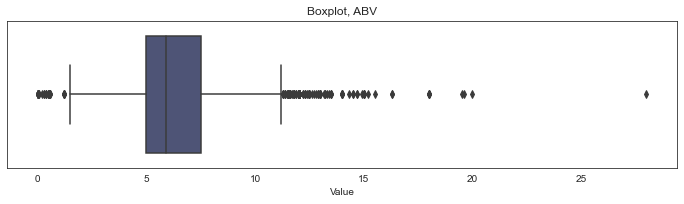

In [33]:
fig, ax = plt.subplots(figsize=(12, 3))
sns.boxplot(x=df['abv'], color=main_color, ax=ax)
ax.set_xlabel('Value')
ax.set_title('Boxplot, ABV')
fig.subplots_adjust(bottom=0.2)
plt.savefig('figures/boxplot_abv.png')

In [18]:
df[df['abv'] > 20].join(df_meta)

,abv,min_ibu,max_ibu,astringency,body,alcohol,bitter,sweet,sour,salty,...,beer_name_full,description,style,style_l2,review_aroma,review_taste,review_appearance,review_palate,review_overall,number_of_reviews
297,30.86,25,35,4,5,14,2,16,6,0,...,Schorschbräu Schorschbock 31%,Notes:,Bock - Eisbock,Eisbock,4.000000,4.500000,4.000000,4.000000,3.500000,1
299,57.50,25,35,0,7,17,3,9,6,0,...,Schorschbräu Schorschbock 57%,Notes:,Bock - Eisbock,Eisbock,4.000000,3.500000,4.000000,4.000000,4.000000,1
2746,28.00,40,100,8,44,64,30,108,18,0,...,Boston Beer Company (Samuel Adams) Samuel Adam...,Notes:Truly the epitome of brewing's two thous...,Strong Ale - American,American,4.453521,4.467606,4.198592,4.246479,4.066197,355


After doing some research, these are super-unique beers that are brewed to be extremely strong. We could theoretically assign them their own category, but with only three observations, for the sake of simplicity, let's remove them.

## Transform the response
Last, we'll transform the response into a pandas 'Categorical' type to better feed some of the scikit-learn estimators.

In [19]:
df = df[df['abv'] < 30]

In [20]:
df['style_l1'] = df['style_l1'].astype("category")

# Write out files

In [21]:
df.to_parquet('data/processed/df_processed')

In [22]:
df_meta.to_parquet('data/processed/df_meta')